# **Recognising COVID Rapid Test Results**

## **Key Assumptions:**
* Our code works for one type of COVID self test
* The COVID test results will display in a pink or red hue

In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# import necessary dependencies
import numpy as np
import cv2
import imutils
from imutils import contours

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# set seed to make this notebook's output stable across runs
np.random.seed(42)

In [6]:
# import dataset 
from sklearn.datasets import fetch_openml

# import 28x28 images of handwritten digits from MNIST database
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)
mnist.target = mnist.target.astype(np.uint8) # as uint8 data type

In [7]:
# randomly split dataset into training set and testing set 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, test_size = 10000, random_state = 42)

In [8]:
# import classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# train Multi-layer Perception classifier
mlp_clr = MLPClassifier(random_state = 42)
mlp_clr.fit(X_train, y_train)

# train K Nearest Neighbor classifier
knn_clr = KNeighborsClassifier(n_neighbors = 3)
knn_clr.fit(X_train, y_train)

# train Random Forest classifier
rf_clr = RandomForestClassifier(random_state = 42, n_estimators = 100)
rf_clr.fit(X_train, y_train)

# make predictions with individual classifiers
y_pred_mlp = mlp_clr.predict(X_test)
y_pred_knn = knn_clr.predict(X_test)
y_pred_rf = rf_clr.predict(X_test)

In [10]:
# import ensemble classifier
from sklearn.ensemble import VotingClassifier

# combine classifiers to create a more accurate ensemble classifier
vot_clr = VotingClassifier(estimators = [('mlp', mlp_clr), ('knn', knn_clr),('rf', rf_clr)],
                           voting = 'soft') # voting classifier predicts based on the argmax of the sums of classifiers' predicted probabilities 
vot_clr.fit(X_train, y_train)

# make prediction with ensemble classifier
y_pred_vot = vot_clr.predict(X_test)

In [11]:
# calculate accuracy scores for various classifiers
from sklearn.metrics import accuracy_score

print("ACCURACY SCORES")
print("---------------")
print("MLP classifier: ", accuracy_score(y_test, y_pred_mlp))
print("KNN classifier: ", accuracy_score(y_test, y_pred_knn))
print("RF classifier:  ", accuracy_score(y_test, y_pred_rf))
print("Voting classifier: ", accuracy_score(y_test, y_pred_vot))

ACCURACY SCORES
---------------
MLP classifier:  0.9625
KNN classifier:  0.9711
RF classifier:   0.9674
Voting classifier:  0.9771


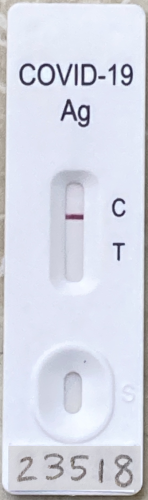

In [13]:
# load image 
orig = cv2.imread("test-image.png")

# resize image to standardize 
new_h = 500 
h, w = orig.shape[:2]
r =  new_h / float(h)
dim = (int(w * r), new_h)
img = resized = cv2.resize(orig, dim, interpolation = cv2.INTER_AREA)

# display image 
cv2.imshow('image', img)

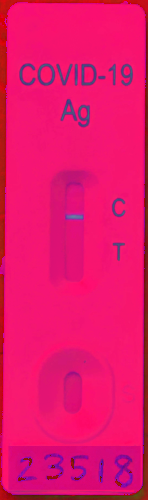

In [15]:
# convert the BGR image to HSV colour space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# display image 
cv2.imshow('hsv', hsv)

In [16]:
# set the lower and upper bounds for the red hue
lower_red = np.array([150,60,0])
upper_red = np.array([179,255,255]) 

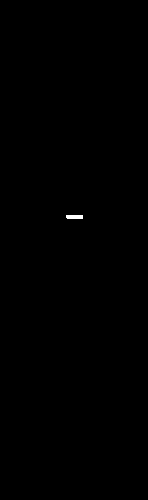

In [17]:
# create a mask for red colour using inRange function
mask = cv2.inRange(hsv, lower_red, upper_red)

# display image 
cv2.imshow('mask', mask)

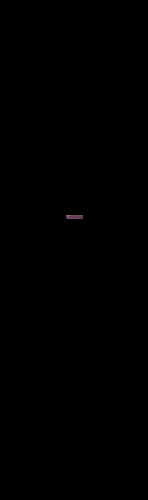

In [18]:
# perform bitwise and on the original image arrays using the mask
res = cv2.bitwise_and(img, img, mask = mask)

# display image 
cv2.imshow('res', res)

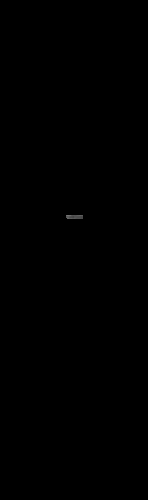

In [19]:
# gray
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

# display image 
cv2.imshow('gray', gray)

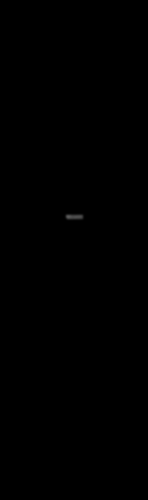

In [20]:
# blur 
blurred = cv2.GaussianBlur(gray, (5, 5), 0) # Gaussian blurring with a 5×5 kernel to reduce high-frequency noise

# display image 
cv2.imshow('blurred', blurred)

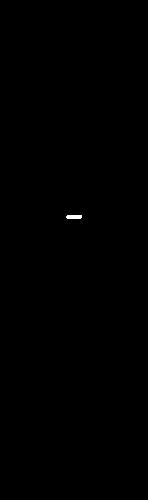

In [21]:
# thresh
ret, thresh = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY)

# display image 
cv2.imshow('thresh', thresh)

In [22]:
# find contours
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts = imutils.grab_contours(cnts)

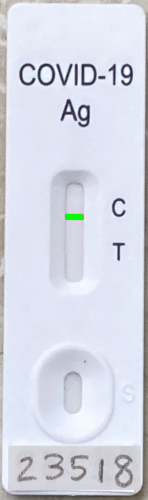

In [23]:
# draw contours
cv2.drawContours(img, cnts, -1, (0, 255, 0), 2)

# display image 
cv2.imshow('image', img)

In [24]:
# drumroll please...
if len(cnts) == 2:
  print('The number of lines found in the COVID test is', len(cnts) )
  print('The COVID test is positive')
elif len(cnts) == 1:
  print('The number of lines found in the COVID test is', len(cnts) )
  print('The COVID test is negative')
else: 
  print('The number of lines found in the COVID test is', len(cnts) )
  print('The COVID test is inconclusive')

The number of lines found in the COVID test is 1
The COVID test is negative


In [26]:
# reset image 
img = resized

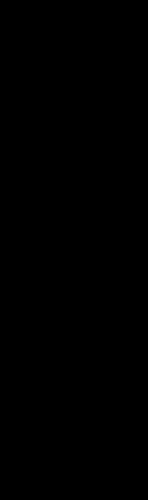

In [27]:
# construct an image of black pixels of the same size.
black = np.zeros((img.shape[0], img.shape[1], 3), np.uint8) #black in RGB

# display image 
cv2.imshow('black', black)

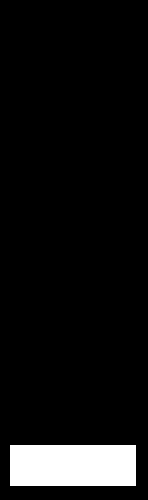

In [28]:
# form the mask and highlight the ROI:
black = cv2.rectangle(black,(10, 445),(135, 485),(255, 255, 255), -1) # the dimension of the ROI
gray = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY) # convert to gray
ret, b_mask = cv2.threshold(gray, 0, 255, 0) # convert to binary

# display image 
cv2.imshow('b_mask', b_mask)

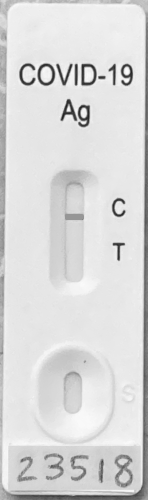

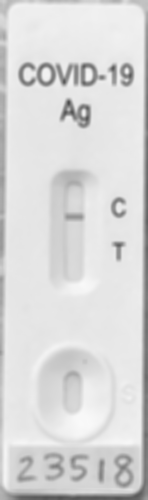

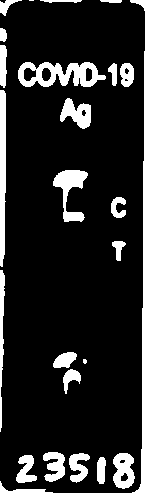

In [29]:
# process original image 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray
cv2.imshow('gray', gray)

blurred = cv2.GaussianBlur(gray, (5, 5), cv2.BORDER_DEFAULT) # Gaussian blurring with a 5×5 kernel to reduce high-frequency noise
cv2.imshow('blurred', blurred)

ret, thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV) # thresh
cv2.imshow('thresh', thresh)

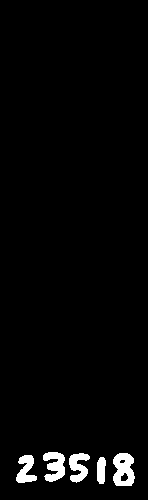

In [30]:
# Mask the image above with your original image
masked = cv2.bitwise_and(thresh, thresh, mask = b_mask)

# display image 
cv2.imshow('masked', masked)

In [31]:
# find contours
cnts = cv2.findContours(masked, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts = imutils.grab_contours(cnts)

In [32]:
# sort the contours from left-to-right
(cnts, _) = contours.sort_contours(cnts, method = "left-to-right")

In [33]:
# initialize list of digit arrays
digits = []
for c in cnts:
   x,y,w,h = cv2.boundingRect(c) # extract bounding rectangle points for each digit contour
   cv2.rectangle(img, # image
                 (x, y), # start point
                 (x+w, y+h), # end point 
                 (0, 255, 0), # color (green)
                 2) # thickness
   digit = thresh[y:y+h, x:x+w] # threshold the digit
   padded_digit = np.pad(array = digit, 
                         pad_width = ((10,10), (10,10)), # add padding around digit array
                         mode = "constant", 
                         constant_values = 0)
   digit = cv2.resize(src = padded_digit, 
                      dsize = (28,28)) # desired size of the output image, given as tuple
   digits.append(digit) # creates a list of digit arrays 

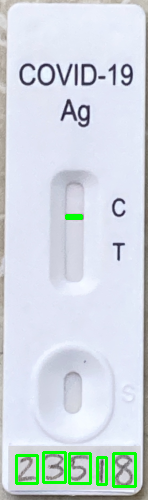

In [34]:
# display contours 
cv2.imshow('image', img)

In [ ]:
# display first digit to make sure order is correct
cv2.imshow('first digit', digits[0])
digits[0].shape

In [36]:
digits = np.array(digits) # convert list of digits to np.array

In [37]:
digits = digits.reshape(digits.shape[0], # length remains equal to the number of digits
                        digits.shape[1]*digits.shape[2]) # the new size is the heighth x width of the digit images (28 x 28 = 784)

In [38]:
y_pred = vot_clr.predict(digits)

In [39]:
print("The serial number for this COVID test is:", y_pred)

The serial number for this COVID test is: [2 3 5 1 8]


## Sources

*   https://stackoverflow.com/questions/62247234/wrong-contours-and-wrong-output-of-handwritten-digit-recognition-ai-model
*   https://python.hotexamples.com/examples/imutils.contours/-/sort_contours/python-sort_contours-function-examples.html
*   https://github.com/PyImageSearch/imutils/blob/master/demos/sorting_contours.py  
* https://medium.com/featurepreneur/colour-filtering-and-colour-pop-effects-using-opencv-python-3ce7d4576140 
* https://stackoverflow.com/questions/42004652/how-can-i-find-contours-inside-roi-using-opencv-and-python
* https://stackoverflow.com/questions/44333605/what-does-bitwise-and-operator-exactly-do-in-opencv
* https://towardsdatascience.com/ensemble-learning-using-scikit-learn-85c4531ff86a
* https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv
* https://stackoverflow.com/questions/30331944/finding-red-color-in-image-using-python-opencv
* https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html
* https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv
* https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html 